### import

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
import numpy as np
import seaborn as sns
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 베이스에 연결

In [ ]:
# connect_database 함수 정의
def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor

# 데이터베이스 연결
mydb, cursor = connect_database()

### 데이터베이스 연결 해제 코드

In [36]:
# 연결 해제하는 코드
#cursor.close()  # 커서 닫기
#mydb.close()    # 데이터베이스 연결 닫기

### 데이터베이스에서 필요한 df를 함수로 가져오는 코드

In [6]:
# 데이터베이스에서 필요한 데이터 가져오는 함수
def fetch_data(query, cursor):
    columns=[]; result=[];
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [i[0] for i in cursor.description]
    df = pd.DataFrame(result, columns=columns)
    return df

### housingsupply 가구수 서울 (2005 ~ 2022)

          date  households_count
0   2012-01-01            3700.6
1   2013-01-01            3728.2
2   2014-01-01            3756.2
3   2015-01-01            3784.5
4   2016-01-01            3784.7
5   2017-01-01            3813.3
6   2018-01-01            3839.8
7   2019-01-01            3896.4
8   2020-01-01            3982.3
9   2021-01-01            4046.8
10  2022-01-01            4098.8


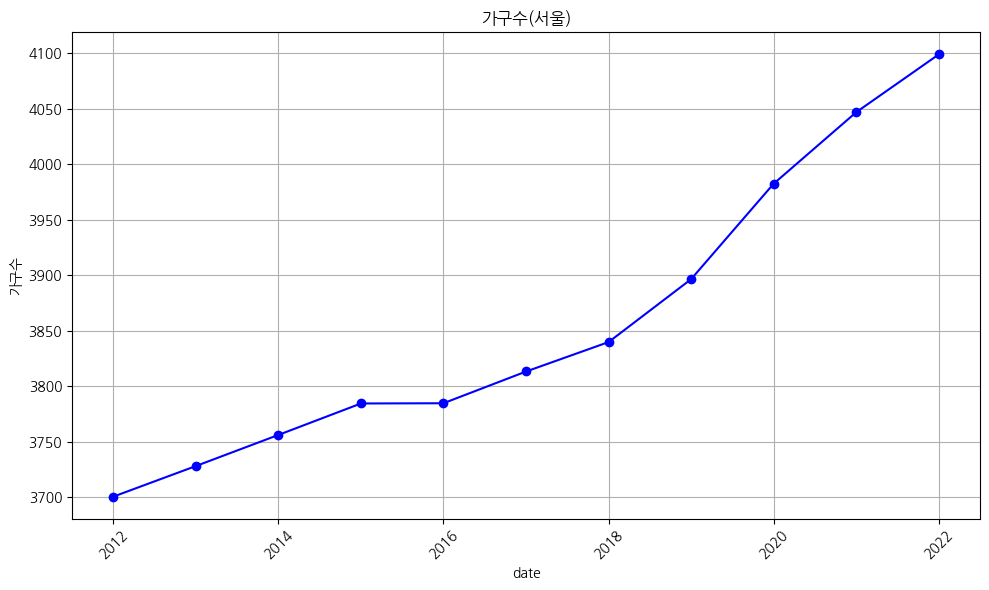

In [5]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_households_count= """
SELECT date, households_count 
FROM housing_supply  
WHERE region_id LIKE '19' and date >= '2012-01-01'
"""
df_housing_supply_households_count = fetch_data(query_housing_supply_households_count, cursor)

# 데이터 확인
print(df_housing_supply_households_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_households_count['date'], df_housing_supply_households_count['households_count'], marker='o', linestyle='-', color='b')
plt.title('가구수(서울)')
plt.xlabel('date') #x축
plt.ylabel('가구수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### hosuingsupply 주택수 서울 (2005 ~ 2022)

          date  housing_count
0   2012-01-01         3509.8
1   2013-01-01         3546.4
2   2014-01-01         3607.6
3   2015-01-01         3633.0
4   2016-01-01         3644.1
5   2017-01-01         3671.5
6   2018-01-01         3682.4
7   2019-01-01         3738.6
8   2020-01-01         3778.4
9   2021-01-01         3811.9
10  2022-01-01         3839.8


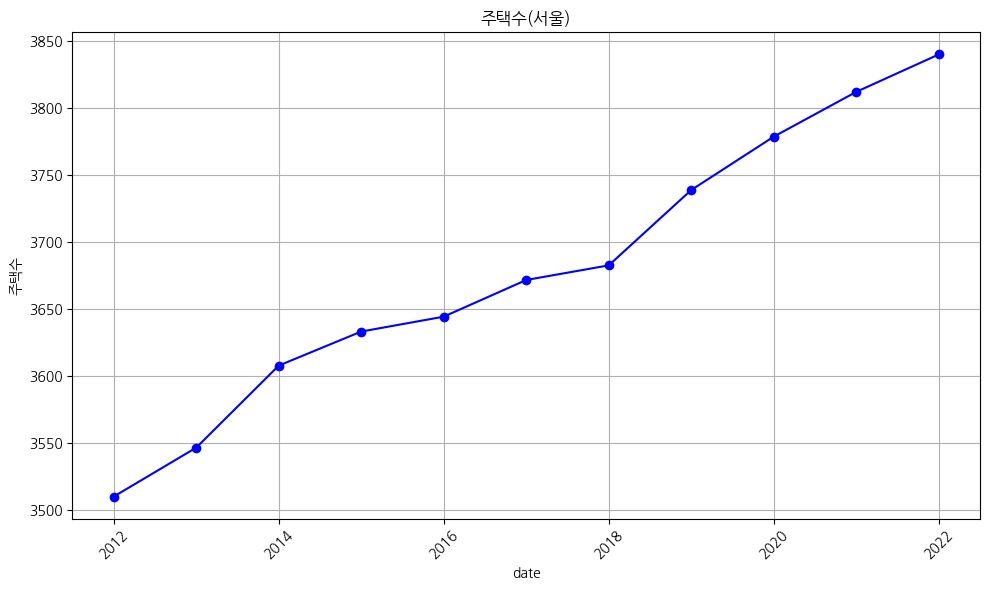

In [33]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_housing_count= """
SELECT date, housing_count
FROM housing_supply  
WHERE region_id LIKE '19' and date >= '2012-01-01'
"""
df_housing_supply_housing_count = fetch_data(query_housing_supply_housing_count, cursor)

# 데이터 확인
print(df_housing_supply_housing_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_housing_count['date'], df_housing_supply_housing_count['housing_count'], marker='o', linestyle='-', color='b')
plt.title('주택수(서울)')
plt.xlabel('date') #x축
plt.ylabel('주택수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### housing_supply 공급률 서울 (2005 ~ 2022)

          date  penetration_rate
0   2012-01-01              94.8
1   2013-01-01              95.1
2   2014-01-01              96.0
3   2015-01-01              96.0
4   2016-01-01              96.3
5   2017-01-01              96.3
6   2018-01-01              95.9
7   2019-01-01              96.0
8   2020-01-01              94.9
9   2021-01-01              94.2
10  2022-01-01              93.7


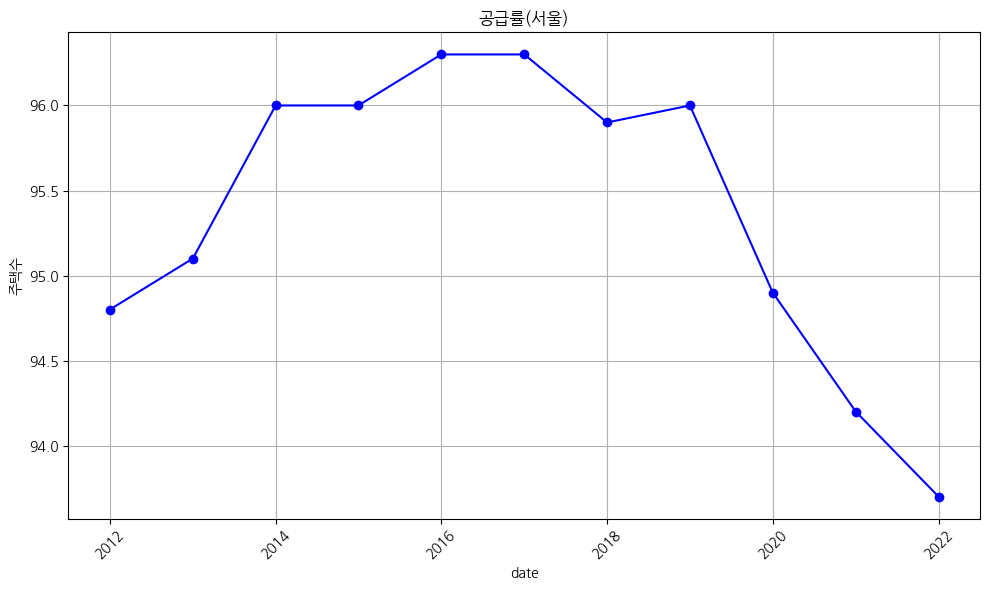

In [34]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_penetration_rate= """
SELECT date, penetration_rate
FROM housing_supply  
WHERE region_id LIKE '19' and date >= '2012-01-01'
"""
df_housing_supply_penetration_rate = fetch_data(query_housing_supply_penetration_rate, cursor)

# 데이터 확인
print(df_housing_supply_penetration_rate)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_penetration_rate['date'], df_housing_supply_penetration_rate['penetration_rate'], marker='o', linestyle='-', color='b')
plt.title('공급률(서울)')
plt.xlabel('date') #x축
plt.ylabel('주택수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 전세가격지수 매매가격지수 겹쳐서 출력
### jeonse_price_index and property_price_index (2003.11 ~ 2024.08)

           date  price_index
0    2003-11-01         52.5
1    2003-12-01         52.1
2    2004-01-01         51.9
3    2004-02-01         52.2
4    2004-03-01         52.5
..          ...          ...
245  2024-04-01         94.0
246  2024-05-01         94.2
247  2024-06-01         94.8
248  2024-07-01         95.9
249  2024-08-01         97.1

[250 rows x 2 columns]
           date  price_index
0    2003-11-01         46.7
1    2003-12-01         46.2
2    2004-01-01         46.0
3    2004-02-01         46.3
4    2004-03-01         46.5
..          ...          ...
245  2024-04-01         87.6
246  2024-05-01         87.9
247  2024-06-01         88.5
248  2024-07-01         89.2
249  2024-08-01         90.0

[250 rows x 2 columns]


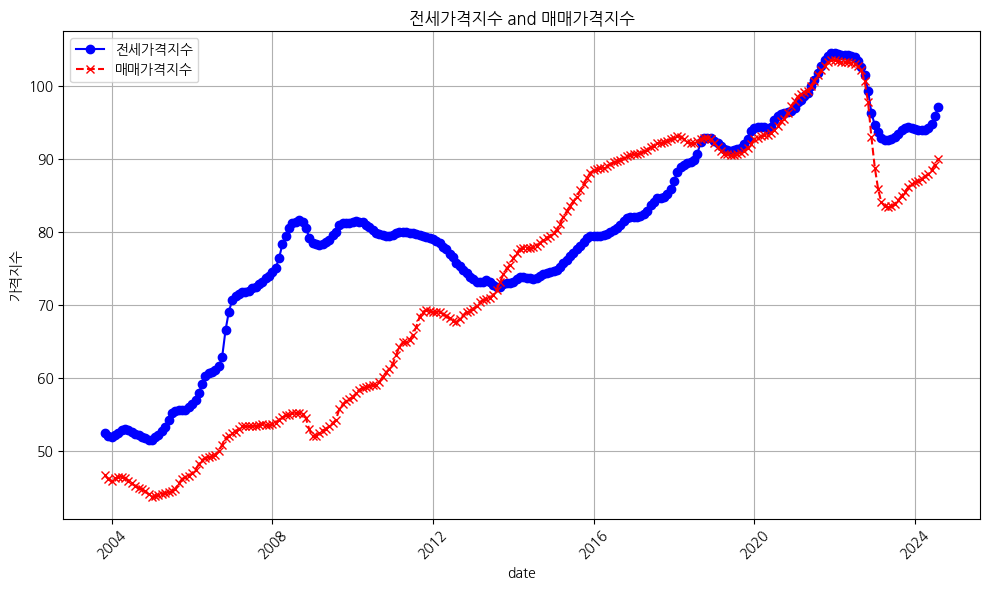

In [18]:
# 전세가격지수 데이터 쿼리
query_jeonse = """
SELECT date, price_index 
FROM jeonse_price_index
WHERE region_id LIKE '19'
"""
df_jeonse = fetch_data(query_jeonse, cursor)

# 매매가격지수 데이터 쿼리
query_maemae = """
SELECT date, price_index 
FROM property_price_index
WHERE region_id LIKE '19'
"""
df_maemae = fetch_data(query_maemae, cursor)

# 데이터 확인
print(df_jeonse)
print(df_maemae)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가격지수 플롯
plt.plot(df_jeonse['date'], df_jeonse['price_index'], marker='o', linestyle='-', color='b', label='전세가격지수')

# 매매가격지수 플롯
plt.plot(df_maemae['date'], df_maemae['price_index'], marker='x', linestyle='--', color='r', label='매매가격지수')

# 그래프 설정
plt.title('전세가격지수 and 매매가격지수')
plt.xlabel('date')
plt.ylabel('가격지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 전세가율 2012~2024

    date      ratio
0   2012  55.399749
1   2013  60.450417
2   2014  65.191778
3   2015  68.382970
4   2016  71.650693
5   2017  71.193439
6   2018  67.511262
7   2019  59.014254
8   2020  57.553762
9   2021  57.873478
10  2022  57.102921
11  2023  53.191910
12  2024  54.395610


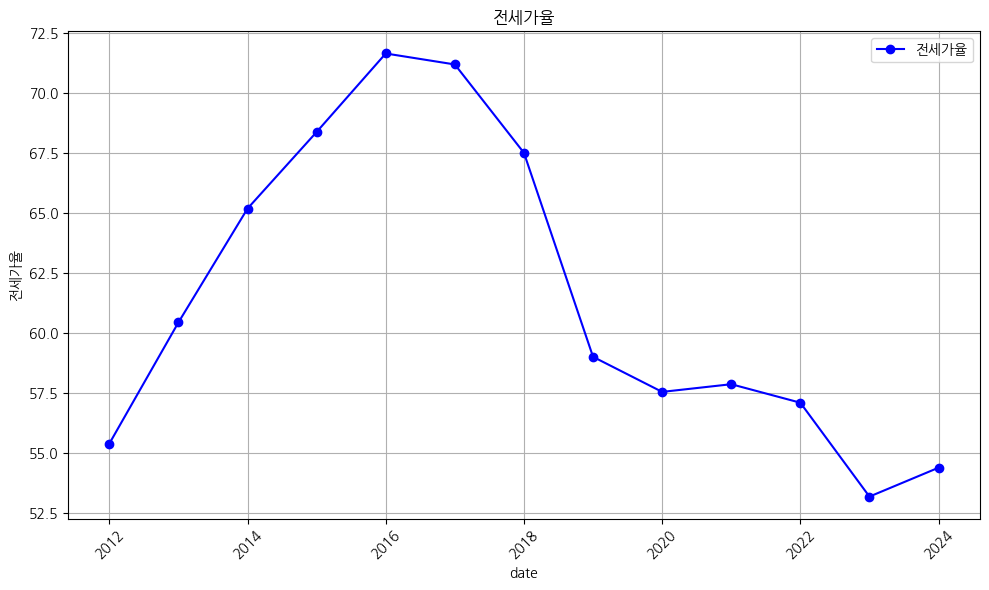

In [19]:
# 전세가율 쿼리 전체를 전부 
#query_jeonse_ratio = """
#SELECT date, ratio
#FROM property_jeonse_ratio_copy
#WHERE region_id LIKE '19'
#"""

# 전세가율 쿼리 년도별로 묶어서 평균을 낸다.
query_jeonse_ratio = """
SELECT YEAR(date) as date, avg(ratio) as ratio
FROM property_jeonse_ratio_copy
WHERE region_id LIKE '19'
group by YEAR(date)
"""
df_jeonse_ratio = fetch_data(query_jeonse_ratio, cursor)

# 데이터 확인
print(df_jeonse_ratio)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_jeonse_ratio['date'], df_jeonse_ratio['ratio'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('전세가율')
plt.xlabel('date')
plt.ylabel('전세가율')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 전세가격지수 매매가격지수 2012년부터 그리기 

    date  price_index
0   2012    76.633334
1   2013    73.025000
2   2014    73.850000
3   2015    76.924999
4   2016    80.416667
5   2017    83.708333
6   2018    90.316667
7   2019    91.866666
8   2020    95.166667
9   2021   100.633333
10  2022   102.691667
11  2023    93.508333
12  2024    94.737500
    date  price_index
0   2012    68.608332
1   2013    71.958333
2   2014    78.058334
3   2015    83.866667
4   2016    89.408333
5   2017    91.616666
6   2018    92.650000
7   2019    91.099999
8   2020    94.258333
9   2021   100.608333
10  2022   101.566666
11  2023    85.025001
12  2024    88.037500


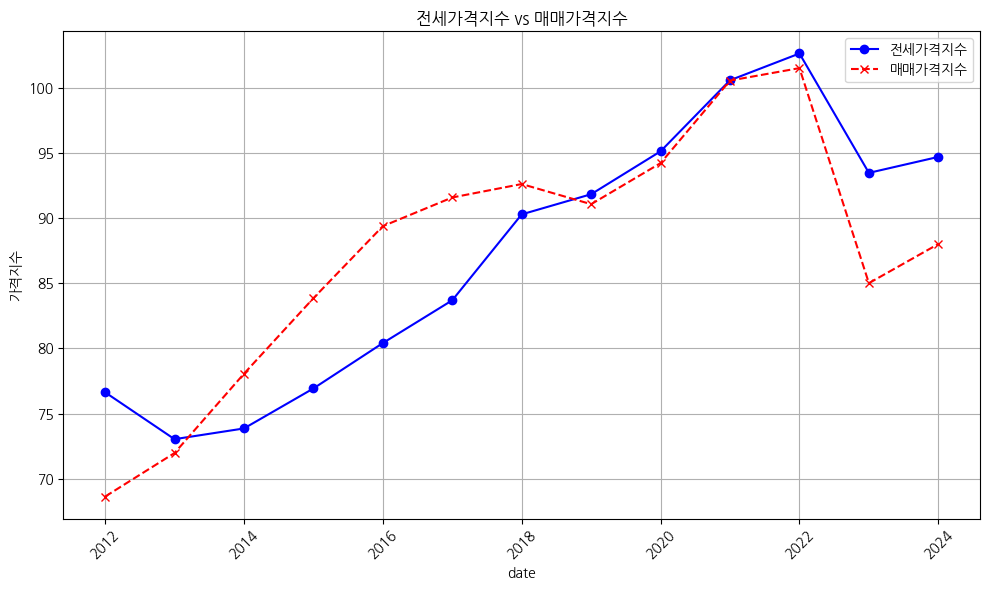

In [62]:
# 전세가격지수 데이터 쿼리
query_jeonse_2012 = """
SELECT YEAR(date) AS date, AVG(price_index) AS price_index 
FROM jeonse_price_index
WHERE region_id LIKE '19' 
AND date >= '2012-01-01'
GROUP BY YEAR(date)
"""
df_jeonse_2012 = fetch_data(query_jeonse_2012, cursor)

# 매매가격지수 데이터 쿼리
query_maemae_2012 = """
SELECT YEAR(date) AS date, AVG(price_index) AS price_index 
FROM property_price_index
WHERE region_id LIKE '19' 
AND date >= '2012-01-01'
GROUP BY YEAR(date)
"""
df_maemae_2012 = fetch_data(query_maemae_2012, cursor)

# 데이터 확인
print(df_jeonse_2012)
print(df_maemae_2012)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가격지수 플롯
plt.plot(df_jeonse_2012['date'], df_jeonse_2012['price_index'], marker='o', linestyle='-', color='b', label='전세가격지수')

# 매매가격지수 플롯
plt.plot(df_maemae_2012['date'], df_maemae_2012['price_index'], marker='x', linestyle='--', color='r', label='매매가격지수')

# 그래프 설정
plt.title('전세가격지수 vs 매매가격지수')
plt.xlabel('date')
plt.ylabel('가격지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 년도별 뉴스 갯수 2013~2024

    date  count
0   2012  17711
1   2013  19394
2   2014  25084
3   2015  22828
4   2016  17864
5   2017  20580
6   2018  20951
7   2019  21108
8   2020  29975
9   2021  38438
10  2022  27698
11  2023  26182
12  2024  17220


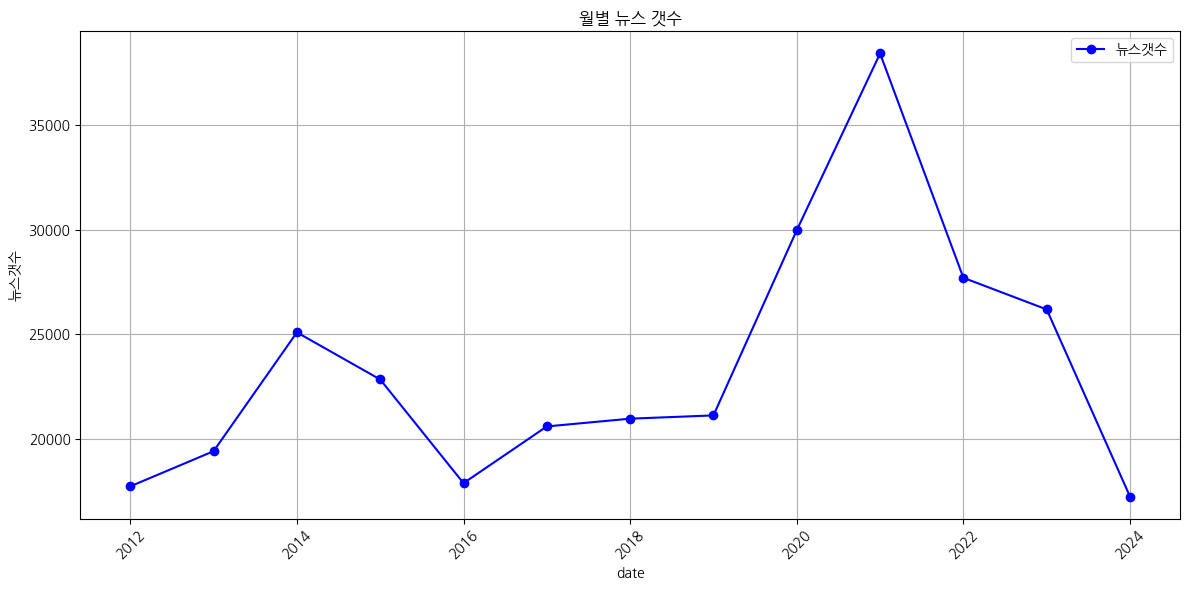

In [23]:
# 뉴스 쿼리  # 8월 데이터가 튀는거같다.
#query_news = """
#SELECT date, count(date) as count
#FROM news_titles_copy
#GROUP BY date
#"""

query_news = """
SELECT YEAR(date) as date, count(date) as count
FROM news_titles
where date >= '2012-01-01'
GROUP BY YEAR(date)
order by YEAR(date)
"""
df_news = fetch_data(query_news, cursor)

# 데이터 확인
print(df_news)

plt.figure(figsize=(12, 6))
plt.plot(df_news['date'], df_news['count'], marker='o', linestyle='-', color='b', label='뉴스갯수')
plt.title('월별 뉴스 갯수')
plt.xlabel('date')
plt.ylabel('뉴스갯수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 전월세 전환율 2011년부터 2024년7월까지 

    date  conversion_rate
0   2012         6.933333
1   2013         6.466667
2   2014         5.800000
3   2015         5.095258
4   2016         4.419937
5   2017         4.111211
6   2018         4.026427
7   2019         4.028674
8   2020         3.976337
9   2021         4.060102
10  2022         4.257906
11  2023         4.720151
12  2024         4.634331


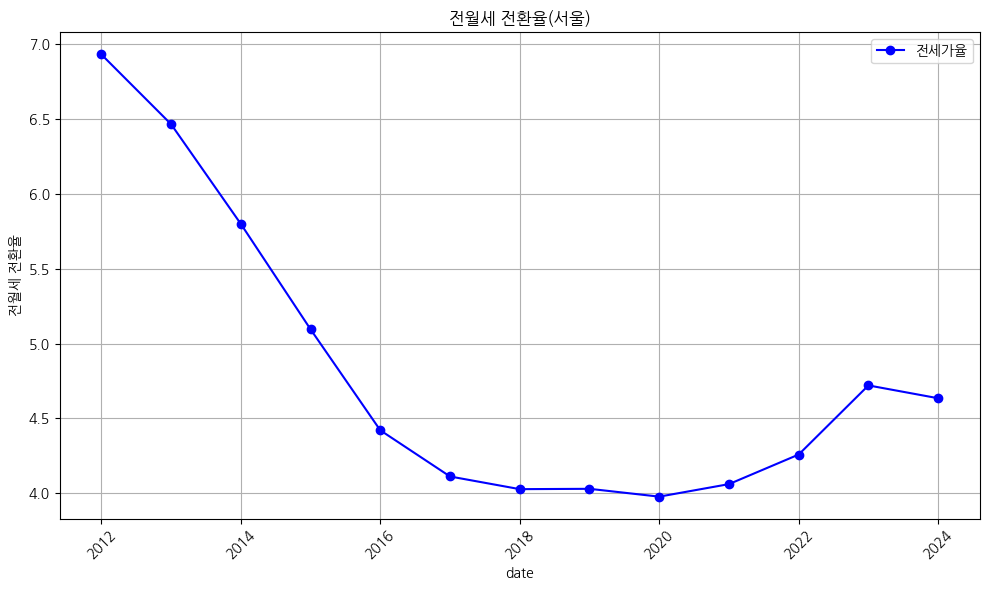

In [35]:
# 전월세전환율
query_rent_conversion_rate = """
SELECT YEAR(date) as date, avg(conversion_rate) as conversion_rate
FROM rent_conversion_rate
WHERE region_id LIKE '19' and date >= '2012-01-01'
group by YEAR(date)
"""
df_rent_conversion_rate  = fetch_data(query_rent_conversion_rate , cursor)

# 데이터 확인
print(df_rent_conversion_rate )

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_rent_conversion_rate ['date'], df_rent_conversion_rate ['conversion_rate'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('전월세 전환율(서울)')
plt.xlabel('date')
plt.ylabel('전월세 전환율')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

### 미분양 물량 갯수 잠깐 보류해보자 

    date  unsold_sum
0   2012     31939.0
1   2013     39971.0
2   2014     26178.0
3   2015      8449.0
4   2016      5926.0
5   2017      1256.0
6   2018       475.0
7   2019      2560.0
8   2020       864.0
9   2021       763.0
10  2022      6646.0
11  2023     13276.0
12  2024      6805.0


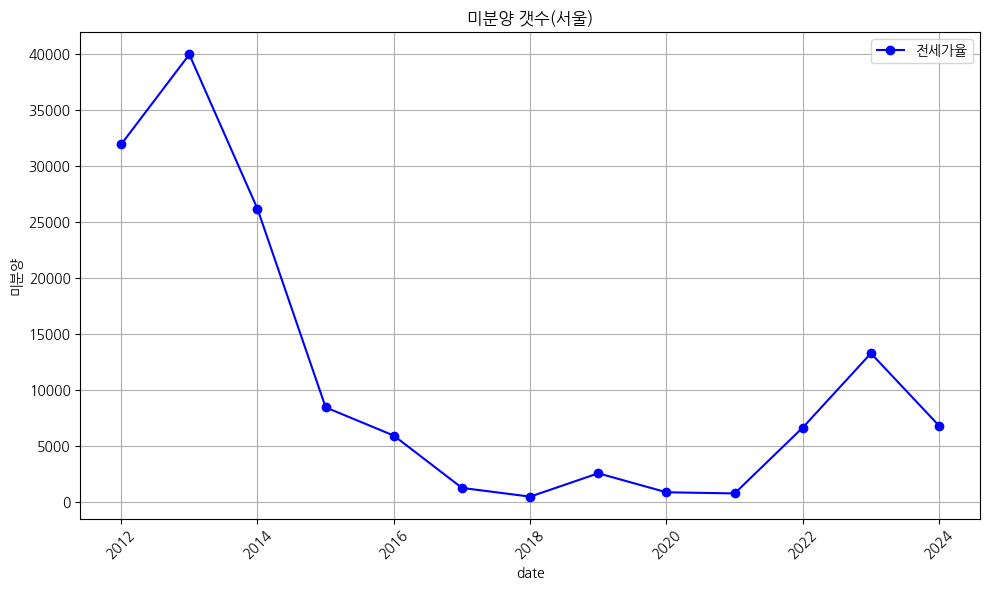

In [25]:
# 미분양
query_unsold_status = """
SELECT YEAR(date) AS date, sum(unsold_sum) as unsold_sum 
FROM unsold_status 
WHERE region_id LIKE '19' and date >= '2012-01-01'
group by YEAR(date)
"""
df_unsold_status  = fetch_data(query_unsold_status  , cursor)

# 데이터 확인
print(df_unsold_status)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_unsold_status ['date'], df_unsold_status ['unsold_sum'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('미분양 갯수(서울)')
plt.xlabel('date')
plt.ylabel('미분양')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

### 대출금 총액 2006 ~ 2023

          date  loan_sum
0   2012-01-01  112092.0
1   2013-01-01  113314.0
2   2014-01-01  123840.0
3   2015-01-01  136922.0
4   2016-01-01  150525.0
5   2017-01-01  157613.0
6   2018-01-01  166251.0
7   2019-01-01  178278.0
8   2020-01-01  199946.0
9   2021-01-01  223482.0
10  2022-01-01  228104.0
11  2023-01-01  237254.0


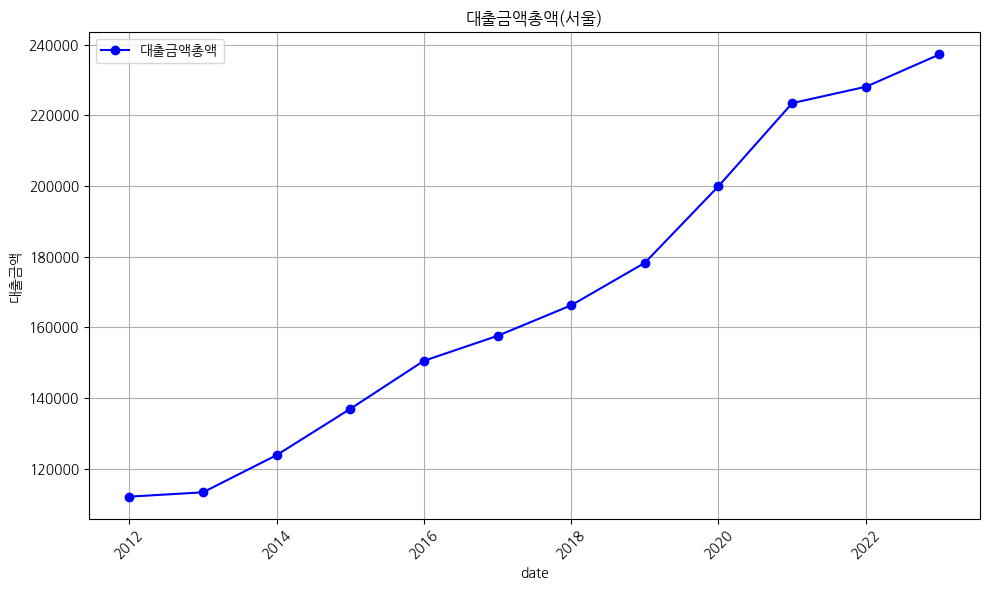

In [27]:
# 대출 금액 총액
query_loan_interest = """
SELECT date, loan_sum
FROM loan_interest
WHERE region_id LIKE '19' and date >= '2012-01-01'
"""
df_loan_interest  = fetch_data(query_loan_interest  , cursor)

# 데이터 확인
print(df_loan_interest)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_loan_interest['date'], df_loan_interest['loan_sum'], marker='o', linestyle='-', color='b', label='대출금액총액')

# 그래프 설정
plt.title('대출금액총액(서울)')
plt.xlabel('date')
plt.ylabel('대출금액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

### 대출금리 2006~2023

    date  interest
0   2012  3.075820
1   2013  2.587671
2   2014  2.350685
3   2015  1.658654
4   2016  1.359290
5   2017  1.271918
6   2018  1.521918
7   2019  1.582877
8   2020  0.704918
9   2021  0.613014
10  2022  2.032192
11  2023  3.459459


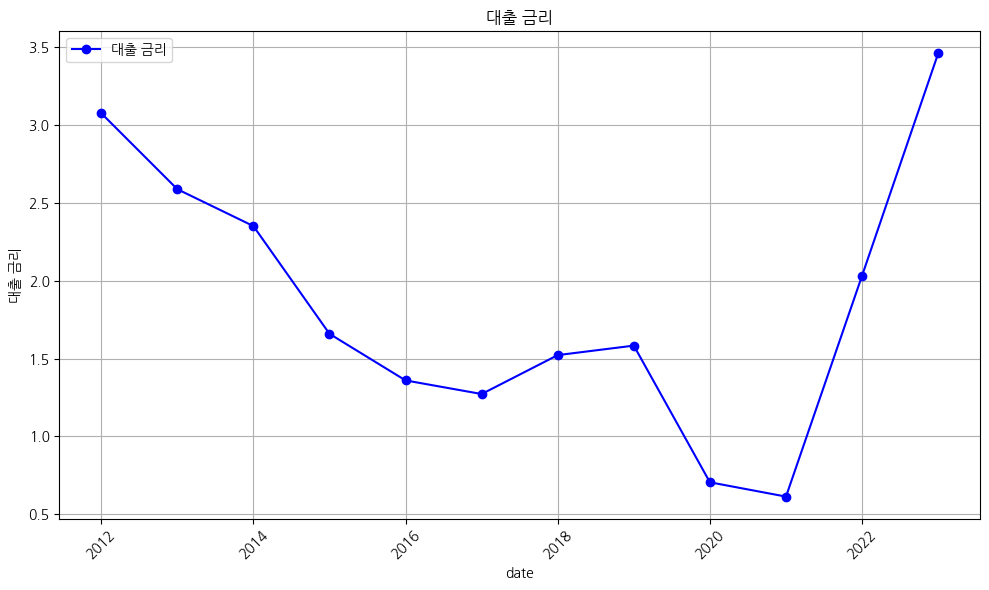

In [28]:
# 대출 금리
query_base_interest = """
SELECT YEAR(date) as date, AVG(interest) AS interest 
FROM base_interest_copy
WHERE date >= '2012-01-01'
GROUP BY YEAR(date)

"""
df_base_interest = fetch_data(query_base_interest, cursor)

# 데이터 확인
print(df_base_interest)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_base_interest['date'], df_base_interest['interest'], marker='o', linestyle='-', color='b', label='대출 금리')

# 그래프 설정
plt.title('대출 금리')
plt.xlabel('date')
plt.ylabel('대출 금리')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 신혼부부 어떻게 뽑아와야하지? 그룹바이를 해서 년 별로 출력할까?

    year  month number
0   2012      1  85337
1   2013      1  82420
2   2014      1  77375
3   2015      1  76738
4   2016      1  69859
5   2017      1  65168
6   2018      1  62972
7   2019      1  58141
8   2020      1  53086
9   2021      1  44299
10  2022      1  43249
11  2023      1  44474


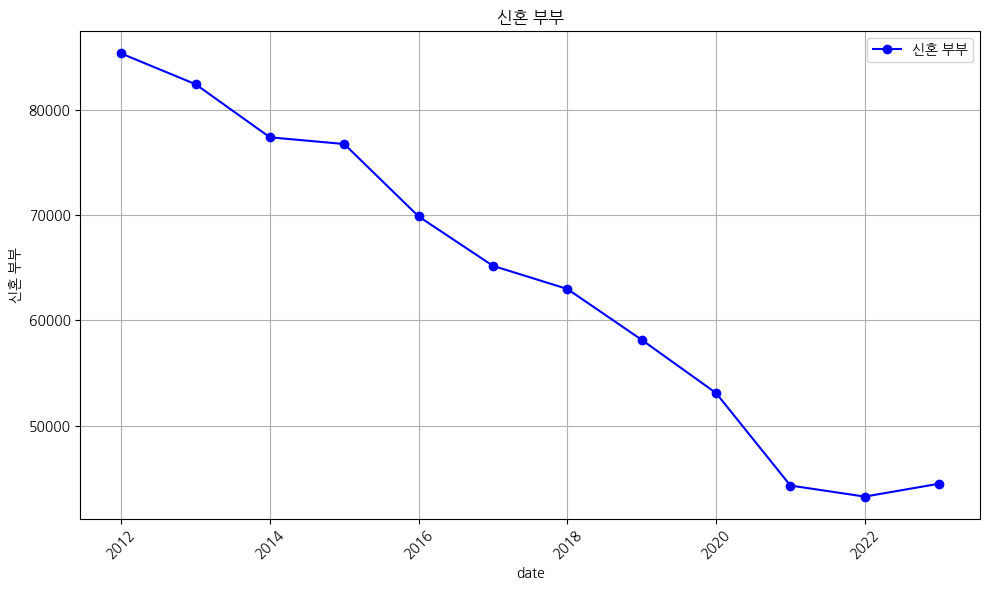

In [29]:
# 신혼부부 marriages
query_marriages = """
SELECT year,month,sum(number)as number 
from marriages
where year >= 2012
group by year
"""
df_marriages = fetch_data(query_marriages, cursor)

# 데이터 확인
print(df_marriages)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_marriages['year'], df_marriages['number'], marker='o', linestyle='-', color='b', label='신혼 부부')

# 그래프 설정
plt.title('신혼 부부')
plt.xlabel('date')
plt.ylabel('신혼 부부')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 주택 멸실지수

    year  loss_count
0   2012        2243
1   2013        1755
2   2014        3837
3   2015        1791
4   2016       10573
5   2017       14738
6   2018        7306
7   2019       12481
8   2020        9329
9   2021        7488
10  2022        1210


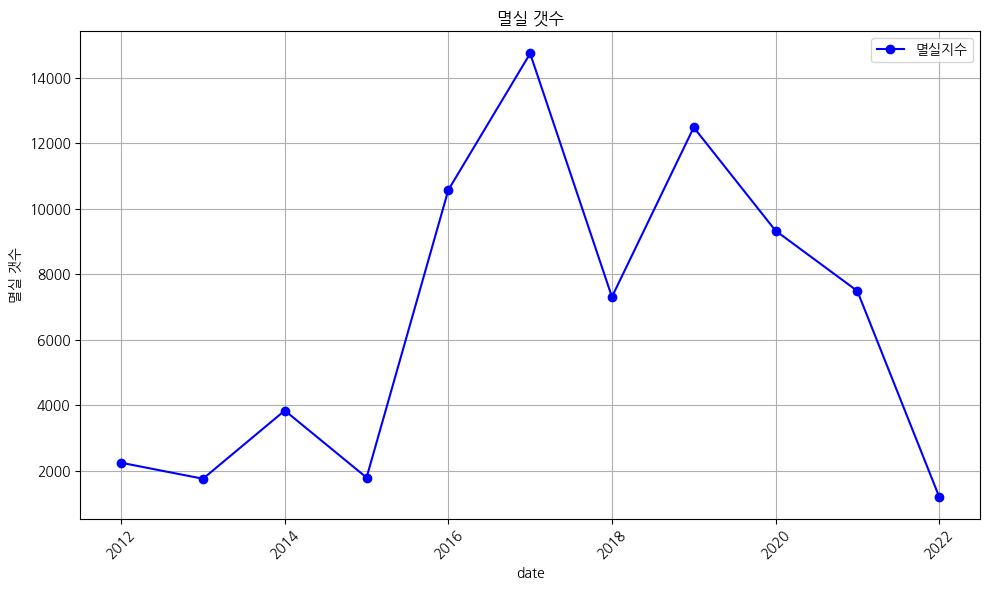

In [30]:
# 멸실지수
query_loss_housing = """
SELECT year, loss_count 
FROM loss_housing
where region_id = 19 and year >= 2012
"""
df_loss_housing = fetch_data(query_loss_housing, cursor)

# 데이터 확인
print(df_loss_housing)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_loss_housing['year'], df_loss_housing['loss_count'], marker='o', linestyle='-', color='b', label='멸실지수')

# 그래프 설정
plt.title('멸실 갯수')
plt.xlabel('date')
plt.ylabel('멸실 갯수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 주택 준공 실적 메리지와같이 연으로 합쳐서 출력한것

    year  month number
0   2012      1  28838
1   2013      1  45189
2   2014      1  48636
3   2015      1  40671
4   2016      1  61790
5   2017      1  49080
6   2018      1  60781
7   2019      1  55044
8   2020      1  74324
9   2021      1  61937
10  2022      1  55134
11  2023      1  59546
12  2024      1  41359


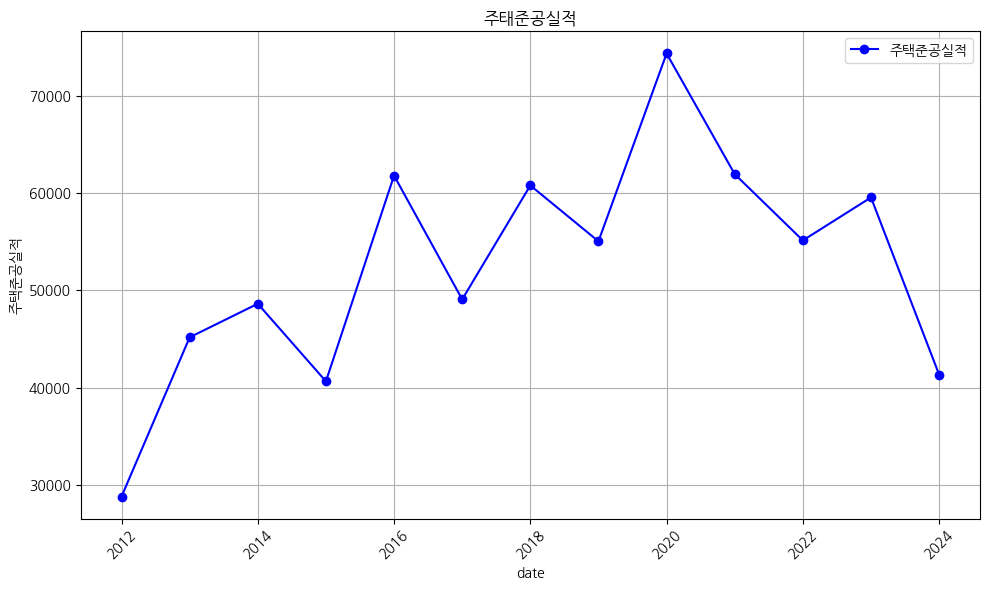

In [31]:
# 신혼부부 marriages
query_house_cp = """
SELECT year,month,sum(number)as number 
from house_cp
where year >= 2012
group by year
"""
df_house_cp = fetch_data(query_house_cp, cursor)

# 데이터 확인
print(df_house_cp)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_house_cp['year'], df_house_cp['number'], marker='o', linestyle='-', color='b', label='주택준공실적')

# 그래프 설정
plt.title('주태준공실적')
plt.xlabel('date')
plt.ylabel('주택준공실적')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### subplot형태

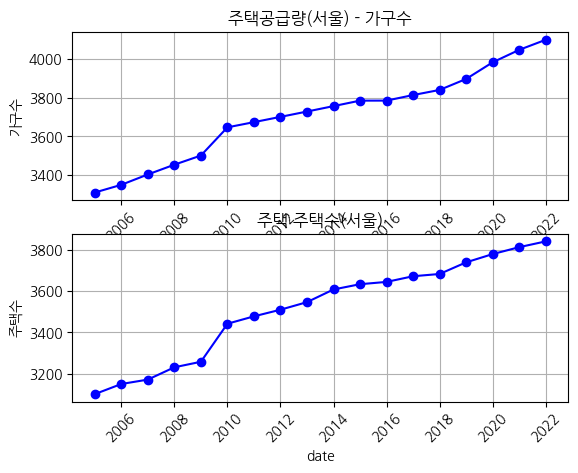

In [20]:
plt.subplot(2, 1, 1)  # 2행 1열에서 첫 번째
plt.plot(df_housing_supply_households_count['date'], df_housing_supply_households_count['households_count'], marker='o', linestyle='-', color='b')
plt.title('주택공급량(서울) - 가구수')
plt.xlabel('date')
plt.ylabel('가구수')
plt.xticks(rotation=45)
plt.grid(True)

# 두 번째 그래프: 주택수
plt.subplot(2, 1, 2)  # 2행 1열에서 두 번째
plt.plot(df_housing_supply_housing_count['date'], df_housing_supply_housing_count['housing_count'], marker='o', linestyle='-', color='b')
plt.title('주택 주택수(서울)')
plt.xlabel('date')
plt.ylabel('주택수')
plt.xticks(rotation=45)
plt.grid(True)

### 그래프 합쳐보기

### 매매가지수 .전세가격지수 VS 전세가율 VS 금리

In [314]:
"""
property_price_index: 매매가지수
property_jeonse_ratio: 전세가율
"""

query_jeonse_ratio = """
SELECT 
    DATE_FORMAT(date,'%Y-%m') AS date,
    avg(ratio) as jeonse_ratio
FROM property_jeonse_ratio_copy
WHERE region_id LIKE '19'
AND date > '2012-01-00'
group by DATE_FORMAT(date,'%Y-%m')
"""

query_meme = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_meme
FROM property_price_index 
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""

query_jeonse = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_jeonse
FROM jeonse_price_index 
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""

query_base_interest = """
select * from base_interest where date > '2012-01-00';
"""
# make data frame
df_jeonse_ratio = fetch_data(query_jeonse_ratio, cursor)
df_meme_price = fetch_data(query_meme, cursor)
df_base_interest = fetch_data(query_base_interest, cursor)
df_jeonse = fetch_data(query_jeonse,cursor)

merged_df = pd.merge(df_meme_price,df_jeonse, on='date',how='left')

merged_df = pd.merge(merged_df, df_jeonse_ratio, on='date', how='left')
merged_df['jeonse_ratio'].fillna(0,inplace=True);

merged_df = pd.merge(merged_df,df_base_interest, on='date', how='left')
merged_df['interest'].fillna(0,inplace=True);

/tmp/ipykernel_13394/845855675.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['jeonse_ratio'].fillna(0,inplace=True);
/tmp/ipykernel_13394/845855675.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

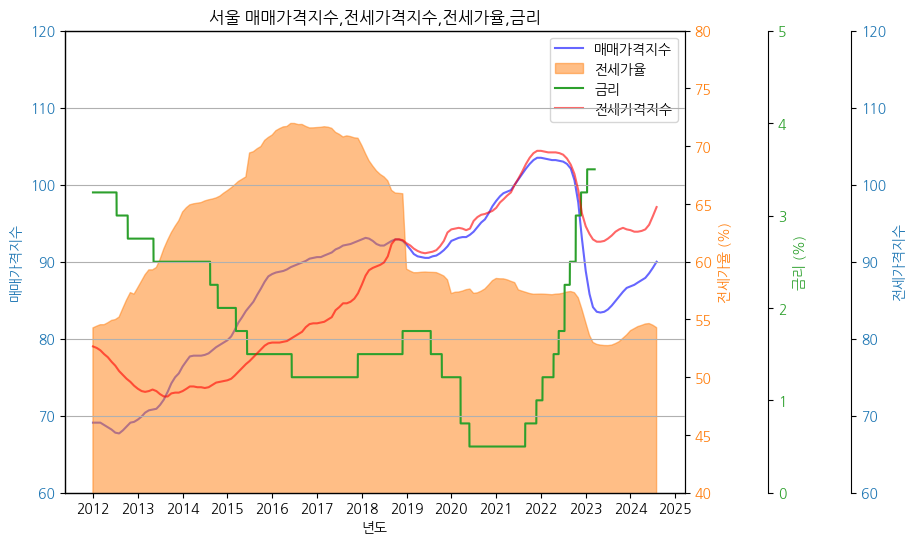

In [330]:
import matplotlib.dates as mdates

merged_df['date'] = pd.to_datetime(merged_df['date'])

plt.figure(figsize=(8, 6))

ax1 = plt.gca()
ax1.set_xlabel('년도')
ax1.set_ylabel('매매가격지수', color='#1f77b4',rotation=90, labelpad=5)
ax1.plot(merged_df['date'], merged_df['total_meme'], color='blue', alpha=0.6, label='매매가격지수')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# 전세가율 그리기
ax2 = ax1.twinx()
ax2.set_ylabel('전세가율 (%)', color='#ff7f0e',rotation=90, labelpad=5)
ax2.fill_between(merged_df['date'], merged_df['jeonse_ratio'], color='#ff7f0e', alpha=0.5,label='전세가율')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # y축 위치 조정
ax3.set_ylabel('금리 (%)', color='#2ca02c', rotation=90, labelpad=5)
ax3.plot(df_base_interest['date'], df_base_interest['interest'], color='#2ca02c', label='금리')
ax3.tick_params(axis='y', labelcolor='#2ca02c')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # y축을 왼쪽으로 이동
ax4.set_ylabel('전세가격지수', color='#1f77b4',rotation=90, labelpad=5)
ax4.plot(merged_df['date'], merged_df['total_jeonse'], color='red', alpha=0.6, label='전세가격지수')
ax4.tick_params(axis='y', labelcolor='#1f77b4')

# 그래프 제목
plt.title('서울 매매가격지수,전세가격지수,전세가율,금리')

# y축 범위 조정
ax1.set_ylim(60, 120)  # 매매가 y축 범위
ax2.set_ylim(40, 80)  # 전세가율의 y축 범위
ax3.set_ylim(0, 5) # 금리 y축 범위
ax4.set_ylim(60, 120)

# x축 레이블 포맷 설정
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 범례 추가
handles, labels = [], []
for ax in [ax1, ax2, ax3,ax4]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1), frameon=True)

plt.grid()
plt.show()

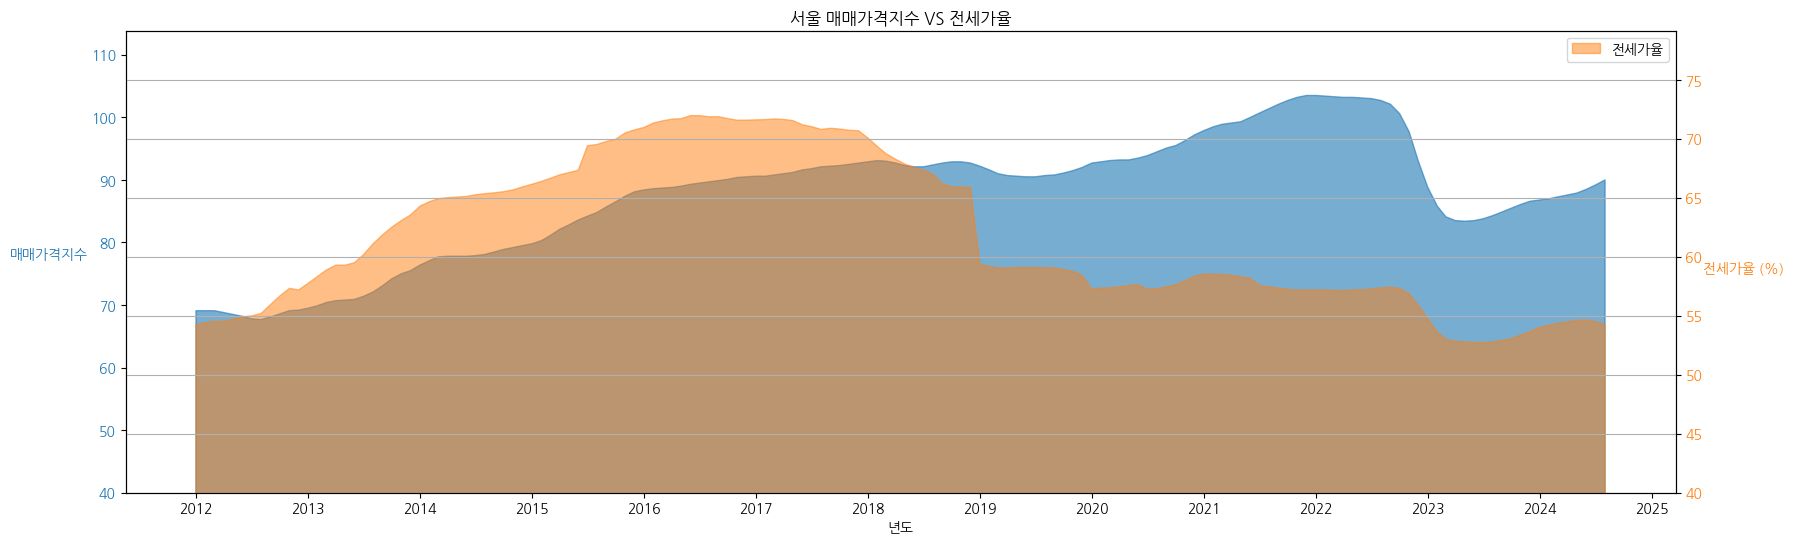

In [221]:
import matplotlib.dates as mdates

merged_df['date'] = pd.to_datetime(merged_df['date'])

plt.figure(figsize=(20, 6))

ax1 = plt.gca()

# 매매가격지수 그리기
# setting labels
ax1.set_xlabel('년도')

ax1.set_ylabel('매매가격지수', color='#1f77b4',rotation=0, labelpad=30)

# draw bar
ax1.fill_between(merged_df['date'], merged_df['total_meme'], color='#1f77b4', alpha=0.6, label='매매가격지수')

# y tcik setting
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# 전세가율 그리기
ax2 = ax1.twinx()

# setting y label
ax2.set_ylabel('전세가율 (%)', color='#ff7f0e',rotation=0, labelpad=30)

# 영 역 전 개
ax2.fill_between(merged_df['date'], merged_df['jeonse_ratio'], color='#ff7f0e', alpha=0.5,label='전세가율')

# y tick setting
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# 금리 그리기
# #  추가 y축 설정
# ax3 = ax1.twinx()

# ax3.spines['right'].set_position(('outward', 60))  # y축 위치 조정
# ax3.set_ylabel('금리 (%)', color='#2ca02c', rotation=0, labelpad=30)

# # draw line for interest
# ax3.plot(df_base_interest['date'], df_base_interest['interest'], color='#2ca02c', label='금리')

# # y tick setting
# ax3.tick_params(axis='y', labelcolor='#2ca02c')

# # 그래프 제목
plt.title('서울 매매가격지수 VS 전세가율')

# # y축 범위 조정
ax1.set_ylim(40, max(merged_df['total_meme']) * 1.1)  # 매매가 y축 범위
ax2.set_ylim(40, max(merged_df['jeonse_ratio']) * 1.1)  # 전세가율의 y축 범위
# ax3.set_ylim(0, max(df_base_interest['interest']) * 1.1) # 금리 y축 범위

# x축 레이블 포맷 설정
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 범례 추가
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
# ax3.legend(loc='lower right')
plt.legend(loc='upper right')

plt.grid()
plt.show()

### 기준금리 VS 전월세전환율 vs 전세가격지수

In [359]:
"""
rent_conversion_rate: 전월세전환율
base_interest: 기준금리
"""

query_rent_conversion_rate = """
SELECT 
    DATE_FORMAT(date,'%Y-%m') AS date,
    conversion_rate
FROM rent_conversion_rate
WHERE region_id LIKE '19'
AND date > '2012-01-00'
group by DATE_FORMAT(date,'%Y-%m')
"""

query_meme = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_meme 
FROM property_price_index 
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""

query_jeonse = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_jeonse
FROM jeonse_price_index 
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""

query_base_interest = """
select * from base_interest where date > '2012-01-00';
"""

# make data frame
df_rent_conversion_rate = fetch_data(query_rent_conversion_rate, cursor)
df_meme_price = fetch_data(query_meme, cursor)
df_base_interest = fetch_data(query_base_interest, cursor)
df_jeonse = fetch_data(query_jeonse,cursor)

merged_df = pd.merge(df_meme_price,df_jeonse,on='date',how='left')

merged_df = pd.merge(df_rent_conversion_rate, merged_df, on='date', how='left')
merged_df['total_meme'].fillna(0,inplace=True);
merged_df['conversion_rate'].fillna(0,inplace=True);

/tmp/ipykernel_13394/2949554077.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['total_meme'].fillna(0,inplace=True);
/tmp/ipykernel_13394/2949554077.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [360]:
merged_df

,date,conversion_rate,total_meme,total_jeonse
0,2012-01,7.10000,69.1,79.0
1,2012-02,7.10000,69.1,78.8
2,2012-03,7.00000,69.1,78.5
3,2012-04,7.00000,68.8,78.0
4,2012-05,7.00000,68.5,77.6
...,...,...,...,...
146,2024-03,4.63160,87.3,93.9
147,2024-04,4.65000,87.6,94.0
148,2024-05,4.62463,87.9,94.2
149,2024-06,4.62857,88.5,94.8


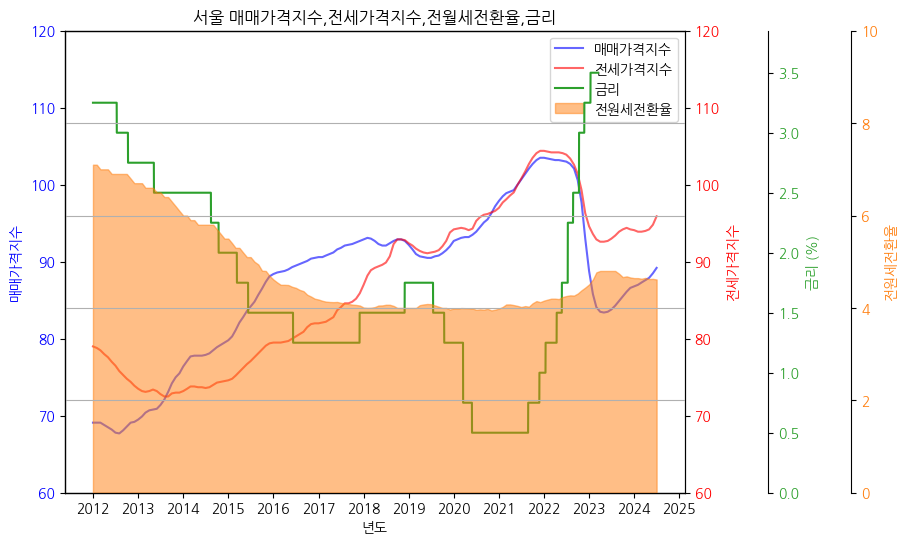

In [371]:
import matplotlib.dates as mdates

merged_df['date'] = pd.to_datetime(merged_df['date'])

plt.figure(figsize=(8, 6))

ax1 = plt.gca()

# 매매가격지수 그리기
# setting labels
ax1.set_xlabel('년도')

ax1.set_ylabel('매매가격지수', color='blue',rotation=90, labelpad=5)

# draw bar
ax1.plot(merged_df['date'], merged_df['total_meme'], color='blue', alpha=0.6, label='매매가격지수')

# y tcik setting
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
# ax2.spines['right'].set_position(('outward', 0))  # y축을 왼쪽으로 이동
ax2.set_ylabel('전세가격지수', color='red',rotation=90, labelpad=5)
ax2.plot(merged_df['date'], merged_df['total_jeonse'], color='red', alpha=0.6, label='전세가격지수')
ax2.tick_params(axis='y', labelcolor='red')

# 금리 그리기
#  추가 y축 설정
ax3 = ax1.twinx()

ax3.spines['right'].set_position(('outward', 60))  # y축 위치 조정
ax3.set_ylabel('금리 (%)', color='#2ca02c', rotation=90, labelpad=5)

# draw line for interest
ax3.plot(df_base_interest['date'], df_base_interest['interest'], color='#2ca02c', label='금리')

# y tick setting
ax3.tick_params(axis='y', labelcolor='#2ca02c')

# 그래프 제목
plt.title('서울 매매가격지수,전세가격지수,전월세전환율,금리')

# ======================================================================
# 전세가율 그리기
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # y축을 왼쪽으로 이동
# setting y label
ax4.set_ylabel('전원세전환율', color='#ff7f0e',rotation=90, labelpad=5)

# 영 역 전 개
ax4.fill_between(merged_df['date'], merged_df['conversion_rate'], color='#ff7f0e', alpha=0.5,label='전원세전환율')

# y tick setting
ax4.tick_params(axis='y', labelcolor='#ff7f0e')
# ======================================================================


# y축 범위 조정
ax1.set_ylim(60, 120)  # 매매가 y축 범위
ax2.set_ylim(60, 120)  # 전세가율의 y축 범위
ax3.set_ylim(0, max(df_base_interest['interest']) * 1.1) # 금리 y축 범위
ax4.set_ylim(0, 10) # 금리 y축 범위

# x축 레이블 포맷 설정
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 범례 추가
handles, labels = [], []
for ax in [ax1, ax2, ax3,ax4]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1), frameon=True)

plt.grid()
plt.show()

### 매매가격지수,전세가격지수 vs 준공 실적 vs 미분양 갯수(증감률)

In [332]:
query_meme = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_meme
FROM property_price_index
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""
query_house_cp= """
SELECT
    year AS date,
    sum(number) as number
FROM house_cp
WHERE region_id LIKE '19'
AND year > '2011'
GROUP BY year;
"""
query_unsold_status = """
select
    DATE_FORMAT(date, '%Y') AS date,
    sum(unsold_sum) as unsold_sum
from unsold_status
where DATE_FORMAT(date, '%Y') > '2011'
and Region_id LIKE '19'
GROUP BY DATE_FORMAT(date, '%Y')
"""
query_jeonse = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_jeonse
FROM jeonse_price_index
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""
# make data frame
df_house_cp = fetch_data(query_house_cp, cursor)
df_meme_price = fetch_data(query_meme, cursor)
df_unsold_status = fetch_data(query_unsold_status, cursor)
df_query_jeonse = fetch_data(query_jeonse, cursor)
# merged_df = pd.merge(df_house_cp, df_unsold_status, on='date', how='left')

In [333]:
result_df = pd.DataFrame(
    data={
        'date': df_house_cp['date'],
        'number':df_house_cp['number'],
        'unsold':df_unsold_status['unsold_sum']
    }
)

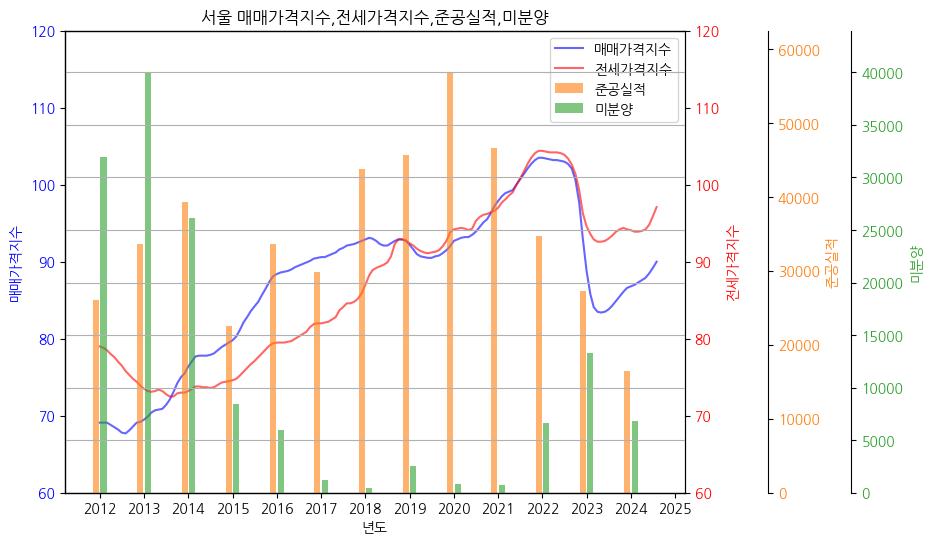

In [335]:
import matplotlib.dates as mdates
# result_df['date'] = pd.to_datetime(result_df['date'])
result_df['date'] = pd.to_datetime(result_df['date'], format='%Y')
df_meme_price['date'] = pd.to_datetime(df_meme_price['date'])
df_query_jeonse['date'] = pd.to_datetime(df_query_jeonse['date'])
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
# 매매가격지수 그리기
# setting labels
ax1.set_xlabel('년도')
ax1.set_ylabel('매매가격지수', color='blue',rotation=90, labelpad=5)
ax1.plot(df_meme_price['date'], df_meme_price['total_meme'], color='blue', alpha=0.6, label='매매가격지수')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
# setting y label
ax2.set_ylabel('전세가격지수', color='red',rotation=90, labelpad=5)
ax2.plot(df_query_jeonse['date'], df_query_jeonse['total_jeonse'], color='red', alpha=0.6, label='전세가격지수')
# y tick setting
ax2.tick_params(axis='y', labelcolor='red')
# ======================================================================
# 전세가율 그리기
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward',60))  # y축 위치 조정
# setting y label
ax3.set_ylabel('준공실적', color='#FF7F0E',rotation=90, labelpad=5)
bar_width = 50
x = result_df['date']
# ax2.plot(result_df['date'], result_df['number'], width=bar_width , color='#FF7F0E', label='number')
ax3.bar(x - pd.DateOffset(months=1), result_df['number'], width=bar_width , alpha=0.6, color='#FF7F0E' ,label='준공실적')
# y tick setting
ax3.tick_params(axis='y', labelcolor='#FF7F0E')
# ======================================================================
#  추가 y축 설정
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # y축 위치 조정
ax4.set_ylabel('미분양', color='#2CA02C', rotation=90, labelpad=5)
# draw line for interest
# ax3.plot(result_df['date'], result_df['unsold'], color='#2CA02C', label='unsold')
ax4.bar(x +  pd.DateOffset(months=1), result_df['unsold'], width=bar_width , alpha=0.6,color='#2CA02C', label='미분양')
# y tick setting
ax4.tick_params(axis='y', labelcolor='#2CA02C')
# 그래프 제목
plt.title('서울 매매가격지수,전세가격지수,준공실적,미분양')
# y축 범위 조정
# ax1.set_ylim(40, max(df_meme_price['total_meme']) * 1.1)  # 매매가 y축 범위
ax1.set_ylim(60, 120)  # 매매가 y축 범위
ax2.set_ylim(60, 120)
ax3.set_ylim(0, int(max(result_df['number'])) * 1.1 )
ax4.set_ylim(0, max(result_df['unsold']) * 1.1)
# x축 레이블 포맷 설정
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# 범례 추가
handles, labels = [], []
for ax in [ax1, ax2, ax3,ax4]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)
ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1), frameon=True)
plt.grid()
plt.show()

### 전세가격지수, 매매가격지수, 뉴스개수

In [342]:
"""
property_price_index: 매매가지수
property_jeonse_ratio: 전세가율
"""

query_news_titles = """
SELECT 
    DATE_FORMAT(date,'%Y-%m') AS date,
    count(news_title) as news_title
FROM news_titles
WHERE date > '2012-01-00'
group by DATE_FORMAT(date,'%Y-%m')
"""

query_meme = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_meme
FROM property_price_index 
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""

query_jeonse = """
SELECT
    DATE_FORMAT(date,'%Y-%m') AS date,
    price_index as total_jeonse
FROM jeonse_price_index 
WHERE region_id LIKE '19'
AND date > '2012-01-00'
GROUP BY DATE_FORMAT(date,'%Y-%m');
"""

# make data frame
df_meme_price = fetch_data(query_meme, cursor)
df_news_title = fetch_data(query_news_titles, cursor)
df_jeonse = fetch_data(query_jeonse,cursor)

merged_df = pd.merge(df_meme_price,df_jeonse, on='date',how='left')

merged_df = pd.merge(merged_df, df_news_title, on='date', how='left')

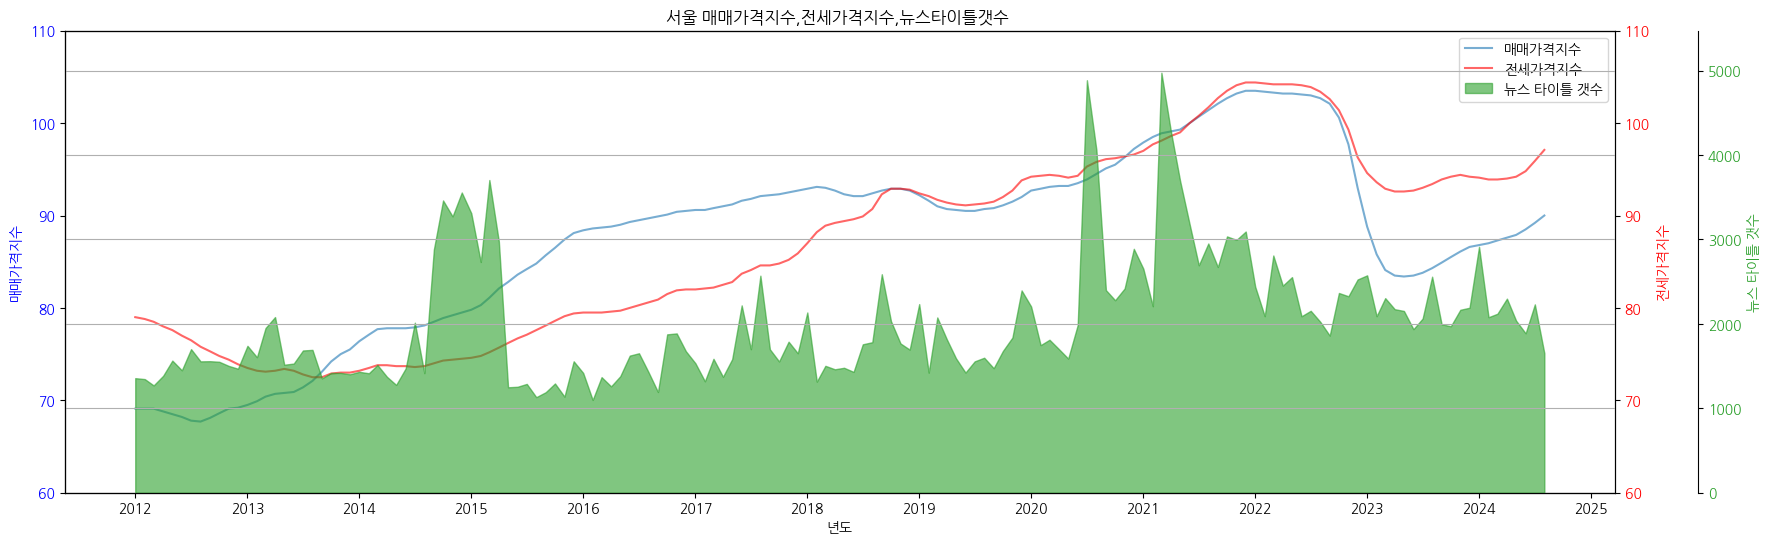

In [344]:
import matplotlib.dates as mdates
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m')
plt.figure(figsize=(20, 6))
ax1 = plt.gca()
# 매매가격지수 그리기
# setting labels
ax1.set_xlabel('년도')
ax1.set_ylabel('매매가격지수', color='blue',rotation=90, labelpad=5)
# draw bar
ax1.plot(merged_df['date'], merged_df['total_meme'], color='#1F77B4', alpha=0.6, label='매매가격지수')
# y tcik setting
ax1.tick_params(axis='y', labelcolor='blue')
# ======================================================================
ax2 = ax1.twinx()
# setting y label
ax2.set_ylabel('전세가격지수', color='red',rotation=90, labelpad=5)
ax2.plot(merged_df['date'], merged_df['total_jeonse'], color='red', alpha=0.6, label='전세가격지수')
# y tick setting
ax2.tick_params(axis='y', labelcolor='red')
# ======================================================================
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # y축 위치 조정
ax3.set_ylabel('뉴스 타이틀 갯수', color='#2CA02C', rotation=90, labelpad=5)
ax3.fill_between(merged_df['date'], merged_df['news_title'],alpha=0.6,color='#2CA02C', label='뉴스 타이틀 갯수')
ax3.tick_params(axis='y', labelcolor='#2CA02C')
# 그래프 제목
plt.title('서울 매매가격지수,전세가격지수,뉴스타이틀갯수 ')
ax1.set_ylim(60, 110)
ax2.set_ylim(60, 110)
ax3.set_ylim(0, max(merged_df['news_title']) * 1.1)
# x축 레이블 포맷 설정
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# 범례 추가
handles, labels = [], []
for ax in [ax1, ax2, ax3]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)
ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1), frameon=True)
plt.grid()
plt.show()